In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


**Đánh dấu các số điện thoại có các số hơi may mắn**

In [ ]:
def SmallSpecial(str):
    Special = ['39', '23', '29', '56', '68', '79', '86']
    for s in Special:
        if s in str:
            return 1
    return 0


**Đánh dấu các số có chứa dãy cực kỳ may mắn**

In [ ]:
def Special(str):
    Special = ['1102', '1111', '1368', '2626', '2628',
               '4078', '5656', '6868', '7939', '8386', '8686']
    for s in Special:
        if s in str:
            return 1
    return 0


**Đánh dấu các số có dãy số cực kỳ xấu**

In [ ]:
def Bad(str):
    Badarray = ['0378', '7762', '2278', '6677', '7308', '7306', '4953', '444']
    for s in Badarray:
        if s in str:
            return 1
    return 0


**Đánh dấu các số hơi xấu ở cuối đuôi**

In [ ]:
def SmallBad(str):
    Badarray = ['04', '26', '29', '33', '35', '41', '44',
                '45', '52', '54', '58', '60', '61', '63', '20', '55']
    for s in Badarray:
        if s in str[-2:]:
            return 1
    return 0


**Hàm đếm độ dài chuỗi số điện thoại tăng dần**

In [ ]:
def increaseLength_orderly(st):
    s = str(st)
    len = 1
    max = 1
    for i in range(0, 8):
        if (ord(s[i]) + 1 == ord(s[i+1])):
            len += 1
        else:
            if (max < len):
                max = len
            len = 1
    if (max < len):
        max = len
    return max if max > 1 else 0


**Hàm đếm độ dài của các số liền kề nhau mà giống nhau**

In [ ]:
def consecutive(str):
    MaxLength = 1
    CurLength = 1
    curr = None
    for char in str:
        if curr == char:
            CurLength += 1
        else:
            if MaxLength < CurLength:
                MaxLength = CurLength
            CurLength = 1
            curr = char
    #Chỉ trả về khi mà có chuỗi dài hơn 2 số
    return MaxLength if MaxLength > 2 else 0


**Kiểm tra có chứa các con số ko đẹp ở giữa không**

In [ ]:
def containBadMiddle(str):
    badnum = ['4', '7']
    for s in badnum:
        if s in str[3:7]:
            return 1
    return 0


**Hàm đếm số lượng palindrome của geeksforgeeks**

In [ ]:
#Hàm này mượn trên trang geeksforgeeks
def CountPS(str):
    n = len(str)
    dp = [[0 for x in range(n)]
          for y in range(n)]
    P = [[False for x in range(n)]
         for y in range(n)]
    for i in range(n):
        P[i][i] = True
    for i in range(n - 1):
        if (str[i] == str[i + 1]):
            P[i][i + 1] = True
            dp[i][i + 1] = 1
    for gap in range(2, n):
        for i in range(n - gap):
            j = gap + i
            if (str[i] == str[j] and P[i + 1][j - 1]):
                P[i][j] = True
            if (P[i][j] == True):
                dp[i][j] = (dp[i][j - 1] +
                            dp[i + 1][j] + 1 - dp[i + 1][j - 1])
            else:
                dp[i][j] = (dp[i][j - 1] +
                            dp[i + 1][j] - dp[i + 1][j - 1])
    return dp[0][n - 1]


**Áp dụng các hàm để tạo dữ liệu**

In [ ]:
input_file = "hai.csv"
df = pd.read_csv(input_file, header=0, dtype={'sim_number': str})
# Dòng này là để tách số sim ra thành từng số lẻ một thay vì cho cả dãy số sim 
# vào → điều này giúp cho model Random Tree không bị overfit vì tách nhánh dựa 
# trên cả dãy string số sim mà tách nhành giựa trên các số đơn lẻ và vị trí của chúng
df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
   ] = df.sim_number.str.split("", expand=True)
# Vì bản chất dữ liệu sau khi tách sẽ tạo ra 3 cột thừa là cột số 0 và số 11 nên
# drop, cột số 1 là cột toàn số 0 nên cũng drop vì không cần thiết
df.drop(['0', '1', '11'], axis=1, inplace=True)
df['consecutive'] = df['sim_number'].apply(consecutive)
df['orderly'] = df['sim_number'].apply(increaseLength_orderly)
df['SmallSpecial'] = df['sim_number'].apply(SmallSpecial)
df['BigSpecial'] = df['sim_number'].apply(Special)
df['BigBad'] = df['sim_number'].apply(Bad)
df['SmallBad'] = df['sim_number'].apply(SmallBad)
df['countPalindrome'] = df['sim_number'].apply(CountPS)
df['BadMiddle'] = df['sim_number'].apply(containBadMiddle)
df


FileNotFoundError: ignored

**Chon feature và tách dữ liệu train ra để test**

In [ ]:
feature = [ '2', '3', '4', '5', '6', '7', '8', '9', '10', 'consecutive',
           'orderly', 'SmallSpecial', 'BigSpecial', 'BigBad', 'SmallBad', 'countPalindrome', 'BadMiddle']
X = df[feature].to_numpy()
Y = df['price_vnd']
Y = np.array(Y)
Y = Y.reshape(-1, 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
df[feature].describe()

,consecutive,orderly,SmallSpecial,BigSpecial,BigBad,SmallBad,countPalindrome,BadMiddle
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.422600,1.078360,0.563510,0.019015,0.020510,0.104070,2.722090,0.539485
std,1.127943,1.118198,0.495951,0.136578,0.141737,0.305352,2.124789,0.498440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000


**Áp dụng tách dữ liệu và phân tích tương tự cho file dữ liệu test**

In [ ]:
test_file = "test.csv"
Testfeature = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', 'consecutive',
           'orderly', 'SmallSpecial', 'BigSpecial', 'BigBad', 'SmallBad', 'countPalindrome', 'BadMiddle']
testdf = pd.read_csv(test_file, header=0, dtype={'sim_number': str})
testdf[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
       ] = testdf.sim_number.str.split("", expand=True)
# File test của thầy có đặc điểm là số ko có số 0 ở đầu :v nên chỉ cần drop 2 cái này
testdf.drop(['0', '10'], axis=1, inplace=True)
testdf['consecutive'] = testdf['sim_number'].apply(consecutive)
testdf['orderly'] = testdf['sim_number'].apply(increaseLength_orderly)
testdf['SmallSpecial'] = testdf['sim_number'].apply(SmallSpecial)
testdf['BigSpecial'] = testdf['sim_number'].apply(Special)
testdf['BigBad'] = testdf['sim_number'].apply(Bad)
testdf['SmallBad'] = testdf['sim_number'].apply(SmallBad)
testdf['countPalindrome'] = testdf['sim_number'].apply(CountPS)
testdf['BadMiddle'] = testdf['sim_number'].apply(containBadMiddle)
Ytest_actual = testdf[Testfeature].to_numpy()


**Hiển thị độ phân tán của giá sim của dữ liệu test**

<function matplotlib.pyplot.show(close=None, block=None)>

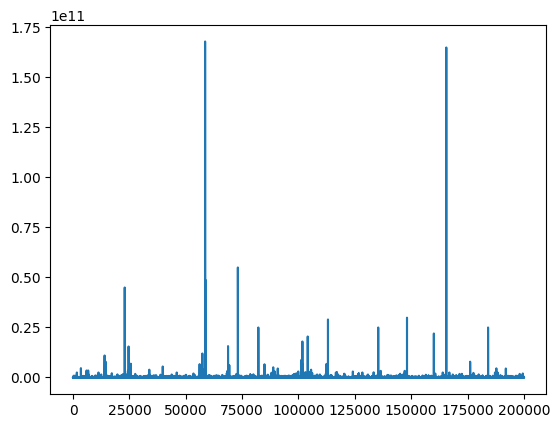

In [ ]:
plt.plot(Y)
plt.show

**Train model**

In [ ]:
# Con số max_depth bị giới hạn xuống 14 để có thể chạy được trên máy cá nhân
# Nếu có thể hãy tăng con số này lên để model có thể chuẩn xác được hơn
# Nếu được thì hãy xóa max_depth đi để model phát triển toàn diện được
clf_DT = RandomForestClassifier(
    max_depth=14)
clf_DT.fit(Xtrain, Ytrain)


C:\Users\Phong Vu\AppData\Local\Temp\ipykernel_17976\14060460.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_DT.fit(Xtrain, Ytrain)


RandomForestClassifier(max_depth=14)

**Vì là dùng Classifier nên ko thể dùng những cái như mean_square_root để tính độ hiệu quả của model** <br>
Đoạn sau là để thử trên dữ liệu train đã được tách ra, đếm số kết quả sai và đếm số kết quả có sai số nhỏ hơn 1tr

In [ ]:
Ypred = clf_DT.predict(Xtest)
Ypred = Ypred.round(0).astype(int)
acc = accuracy_score(Ytest, Ypred)
count = 0
countsmalldiff = 0
for input, output, label in zip(Xtest, Ypred, Ytest):
    if output != label:
        count += 1
        if abs(label-output) < 1000000:
            countsmalldiff += 1
        print(input, 'Is predicted to be: ', output,
              ' but acctually: ', label, ' diff: ', abs(label - output))
accWithDiff = (1 - (count-countsmalldiff)/len(Ytest))*100
accWithDiff = accWithDiff.__round__(0)
print('average precision of the predicted value: ', acc)
print('total number of wrong prediction: ', count, '/', len(Ytest))
print('total small diff:', countsmalldiff)
print('Factoring in the small diff amount and we have an accuracy of: ~', accWithDiff)


['3' '3' '8' '8' '3' '3' '5' '9' '5' 0 0 0 0 0 0 6 0] Is predicted to be:  5000000  but acctually:  [10000000]  diff:  [5000000]
['9' '8' '2' '4' '0' '9' '4' '9' '8' 0 0 0 0 0 0 1 1] Is predicted to be:  3000000  but acctually:  [500000]  diff:  [2500000]
['9' '3' '1' '3' '1' '1' '3' '1' '1' 0 0 0 0 0 0 8 0] Is predicted to be:  3000000  but acctually:  [70000000]  diff:  [67000000]
['9' '3' '9' '5' '8' '8' '6' '6' '6' 0 0 1 0 0 0 5 0] Is predicted to be:  3000000  but acctually:  [69000000]  diff:  [66000000]
['9' '7' '8' '4' '6' '1' '6' '8' '8' 0 2 1 0 0 0 2 1] Is predicted to be:  3000000  but acctually:  [5000000]  diff:  [2000000]
['3' '7' '9' '6' '8' '6' '8' '8' '8' 0 0 1 1 0 0 5 0] Is predicted to be:  5000000  but acctually:  [66000000]  diff:  [61000000]
['3' '2' '6' '3' '9' '3' '6' '9' '6' 0 0 1 0 0 0 3 0] Is predicted to be:  450000  but acctually:  [5000000]  diff:  [4550000]
['3' '7' '4' '1' '6' '0' '3' '2' '0' 0 0 0 0 0 1 0 1] Is predicted to be:  450000  but acctually:  

**Độ ảnh hưởng của các feature đến dự đoán của model**

<AxesSubplot: >

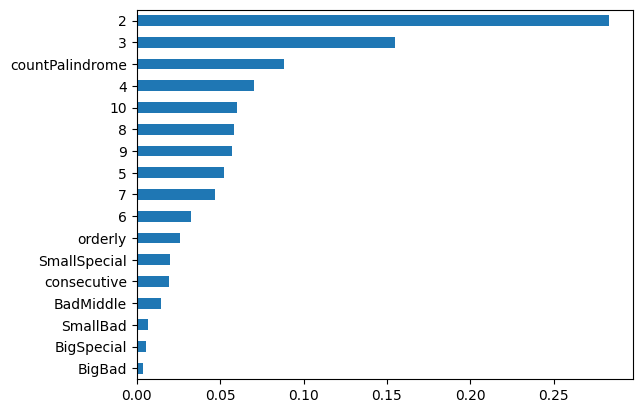

In [ ]:
from matplotlib.pyplot import figure
Xforfeature = df[feature]
feat_importances = pd.Series(clf_DT.feature_importances_, index = Xforfeature.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

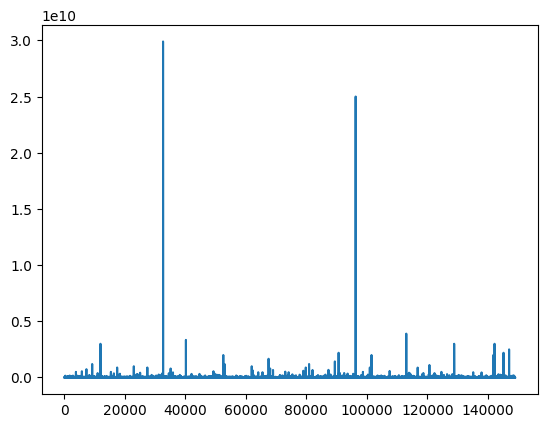

In [ ]:
Testpred = clf_DT.predict(Ytest_actual)
plt.plot(Testpred)
plt.show()
#prediction = pd.DataFrame(Testpred, columns=['price_vnd']).round(0).astype(int).to_csv('result.csv')
